In [46]:
import pandas as pd
import numpy as np
import pyforest
import seaborn as sns
import statsmodels.formula.api as smf

In [47]:
data1=pd.read_csv('C:/Users/seema_dhama/OneDrive - Dell Technologies/Desktop/Data Science/Assignments/delivery_time.csv')
data1.head

<bound method NDFrame.head of     Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

In [48]:
data_eda=data1.rename({"Delivery Time":"Delivery_Time","Sorting Time":"Sorting_Time"},axis=1)
data_eda.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [49]:
data_eda.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<AxesSubplot:>

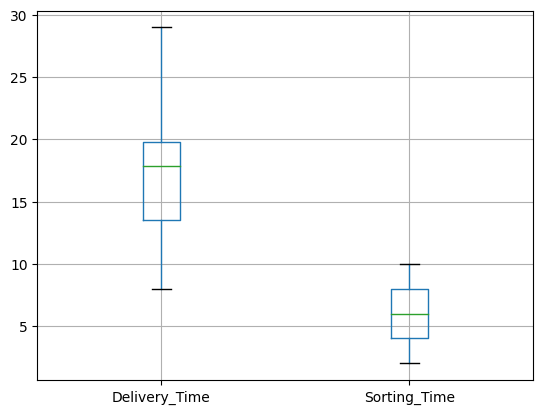

In [50]:
data_eda.boxplot()


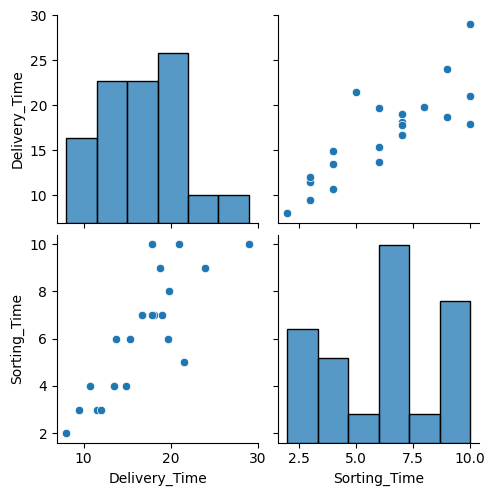

In [51]:
sns.pairplot(data_eda)


c:\users\seema_dhama\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

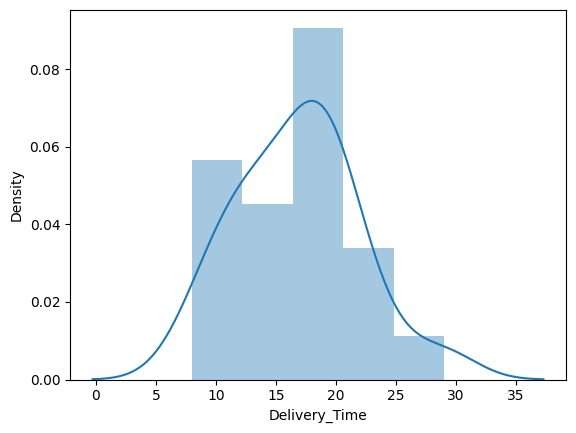

In [52]:
sns.distplot(data_eda['Delivery_Time'])


c:\users\seema_dhama\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

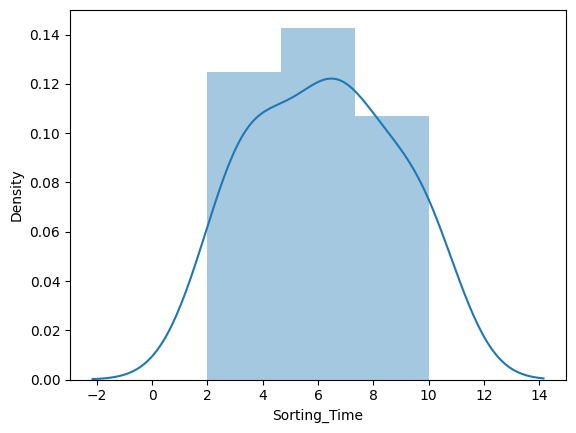

In [53]:
sns.distplot(data_eda['Sorting_Time'])


In [54]:
data_eda.corr()


,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [55]:
X = data_eda.iloc[:, :-1].values
y = data_eda.iloc[:, 1].values

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [57]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [58]:
y_pred = regressor.predict(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

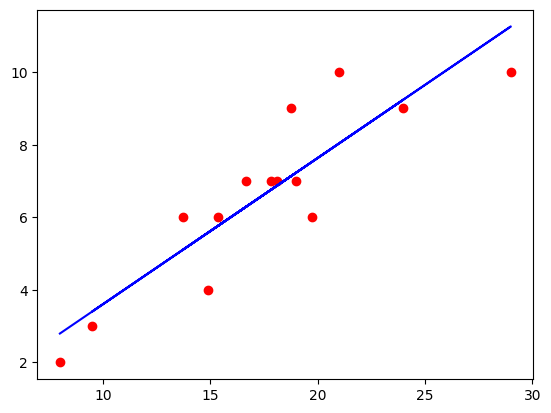

In [59]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

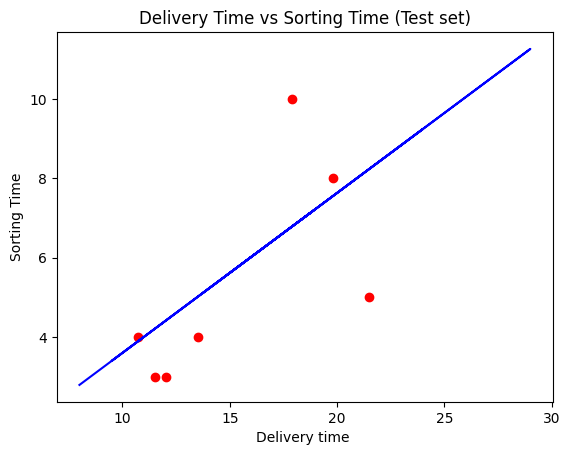

In [60]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Delivery Time vs Sorting Time (Test set)')
plt.xlabel('Delivery time ')
plt.ylabel('Sorting Time')
plt.show()

In [61]:
import statsmodels.formula.api as smf
model=smf.ols("Delivery_Time~Sorting_Time",data = data_eda).fit()


In [70]:
model.tvalues , model.pvalues

(Intercept       3.823349
 Sorting_Time    6.387447
 dtype: float64,
 Intercept       0.001147
 Sorting_Time    0.000004
 dtype: float64)

In [71]:
model.params


Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [64]:
randdata=pd.Series([10,15,12,6,8,10,4,7,5,5,12,20,10,6,4,5])


In [65]:
predict_data=pd.DataFrame(randdata,columns=['Sorting_Time'])
predict_data.head()

,Sorting_Time
0,10
1,15
2,12
3,6
4,8


In [66]:
predict_model=model.predict(predict_data)
predict_model

0     23.072933
1     31.318032
2     26.370973
3     16.476853
4     19.774893
5     23.072933
6     13.178814
7     18.125873
8     14.827833
9     14.827833
10    26.370973
11    39.563132
12    23.072933
13    16.476853
14    13.178814
15    14.827833
dtype: float64

In [72]:
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

<AxesSubplot:xlabel='Delivery_Time', ylabel='Sorting_Time'>

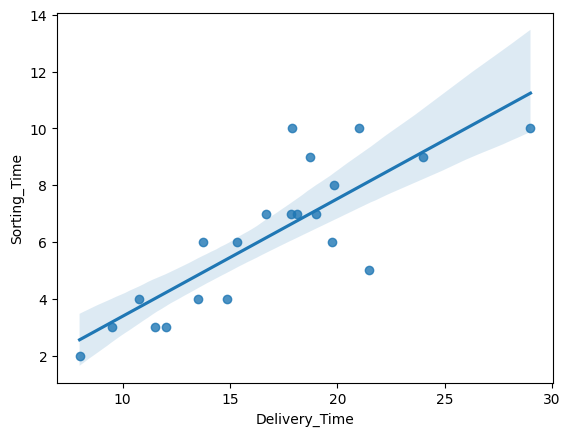

In [73]:
sns.regplot(x="Delivery_Time", y="Sorting_Time", data=data_eda)

In [74]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        02:40:32   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""